<a href="https://colab.research.google.com/github/meer-1/trajectory-of-mobile-robot/blob/main/experiment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

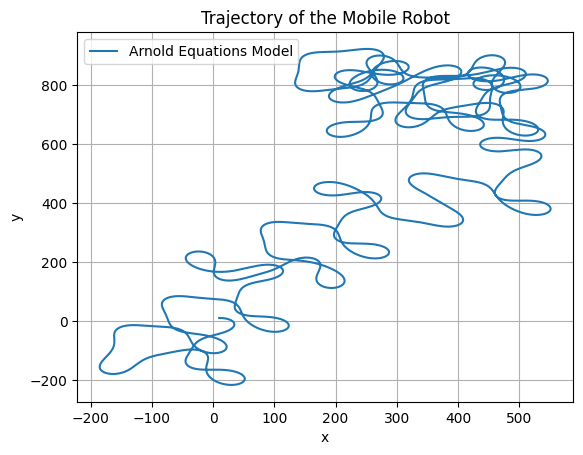

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 0.5
B = 0.25
C = 0.25
v = 10
h = 0.1  # Step size for RK4 method

# Initial conditions
state = np.array([4, 3.6, 0, 10, 10])

# Function defining the Arnold equations and position update
def f(state):
    x1, x2, x3, xp, yp = state
    dx1 = A * np.sin(x3) + C * np.cos(x2)
    dx2 = B * np.sin(x1) + A * np.cos(x3)
    dx3 = C * np.sin(x2) + B * np.cos(x1)
    dxp = v * np.cos(x3)
    dyp = v * np.sin(x3)
    return np.array([dx1, dx2, dx3, dxp, dyp])

# Runge-Kutta 4th order method
def rk4_step(f, state, h):
    k1 = f(state)
    k2 = f(state + h/2 * k1)
    k3 = f(state + h/2 * k2)
    k4 = f(state + h * k3)
    return state + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

# Simulate the system
steps = 10000
trajectory = np.zeros((steps, 5))
trajectory[0] = state

for i in range(1, steps):
    state = rk4_step(f, state, h)
    trajectory[i] = state

# Plot the trajectory
plt.plot(trajectory[:, 3], trajectory[:, 4], label='Arnold Equations Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of the Mobile Robot')
plt.legend()
plt.grid(True)
plt.show()


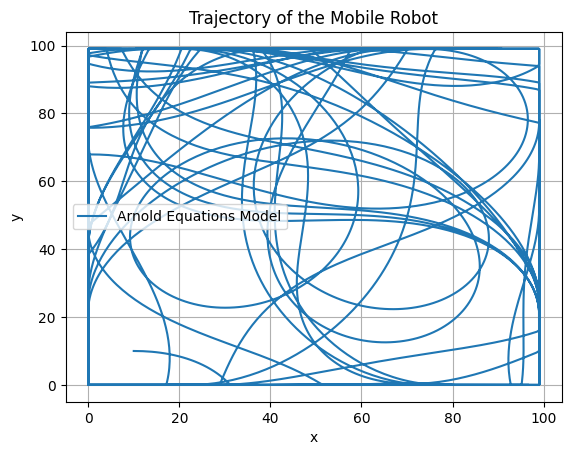

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 0.5
B = 0.25
C = 0.25
v = 10
h = 0.1  # Step size for RK4 method

# Initial conditions
state = np.array([4, 3.6, 0, 10, 10])

# Function defining the Arnold equations and position update
def f(state):
    x1, x2, x3, xp, yp = state
    dx1 = A * np.sin(x3) + C * np.cos(x2)
    dx2 = B * np.sin(x1) + A * np.cos(x3)
    dx3 = C * np.sin(x2) + B * np.cos(x1)
    dxp = v * np.cos(x3)
    dyp = v * np.sin(x3)
    return np.array([dx1, dx2, dx3, dxp, dyp])

# Runge-Kutta 4th order method
def rk4_step(f, state, h):
    k1 = f(state)
    k2 = f(state + h/2 * k1)
    k3 = f(state + h/2 * k2)
    k4 = f(state + h * k3)
    new_state = state + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    # Apply clipping to the position values
    new_state[3] = np.clip(new_state[3], 0, 99)  # Clip xp to [0, 99]
    new_state[4] = np.clip(new_state[4], 0, 99)  # Clip yp to [0, 99]
    return new_state

# Simulate the system
steps = 10000
trajectory = np.zeros((steps, 5))
trajectory[0] = state

for i in range(1, steps):
    state = rk4_step(f, state, h)
    trajectory[i] = state

# Plot the trajectory
plt.plot(trajectory[:, 3], trajectory[:, 4], label='Arnold Equations Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of the Mobile Robot')
plt.legend()
plt.grid(True)
plt.show()


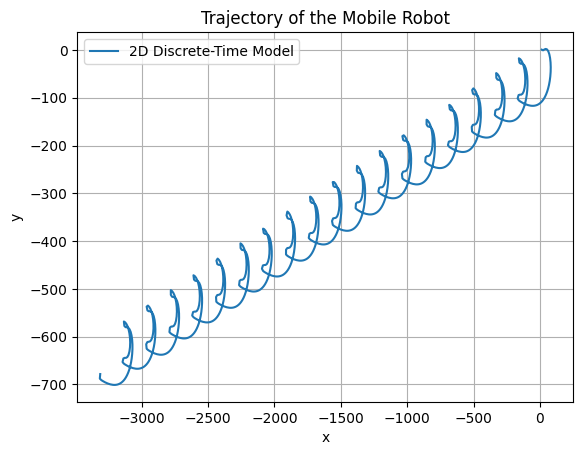

In [ ]:
# Parameters
kf = 0.5
kr = 0.8905
d = 1.0
W = 15
alpha = 4
a = 0.5
Em = 15.1086
Epp = 32.8216
epsilon = 0.1

# Initial conditions
x = 0.1
y = 0.1
xp = 10
yp = 10
v = 10

# Sigmoid function
def sigmoid(u, epsilon):
    return 1 / (1 + np.exp(-u / epsilon))

# Simulation
steps = 1000
trajectory = np.zeros((steps, 2))

for t in range(steps):
    s = sigmoid(x + y, epsilon)
    x = kf * x + d + W * s
    y = kr * y - alpha * s + a
    theta = 2 * np.pi * (x + y + Em) / Epp
    xp += v * np.cos(theta)
    yp += v * np.sin(theta)
    trajectory[t] = [xp, yp]

# Plotting the trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1], label='2D Discrete-Time Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of the Mobile Robot')
plt.legend()
plt.grid(True)
plt.show()


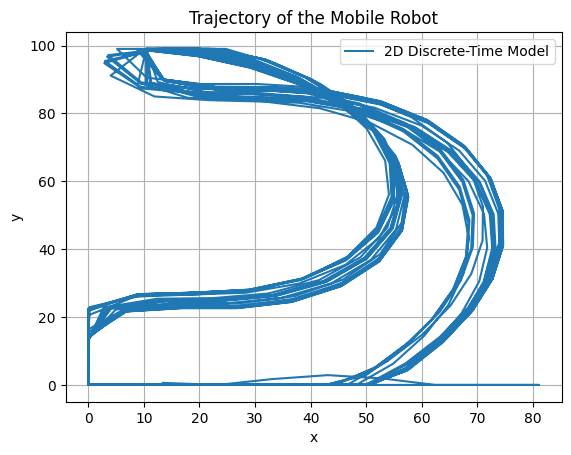

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
kf = 0.5
kr = 0.8905
d = 1.0
W = 15
alpha = 4
a = 0.5
Em = 15.1086
Epp = 32.8216
epsilon = 0.1

# Initial conditions
x = 0.1
y = 0.1
xp = 10
yp = 10
v = 10

# Sigmoid function
def sigmoid(u, epsilon):
    return 1 / (1 + np.exp(-u / epsilon))

# Simulation
steps = 1000
trajectory = np.zeros((steps, 2))

for t in range(steps):
    s = sigmoid(x + y, epsilon)
    x = kf * x + d + W * s
    y = kr * y - alpha * s + a
    theta = 2 * np.pi * (x + y + Em) / Epp
    xp += v * np.cos(theta)
    yp += v * np.sin(theta)

    # Apply clipping to the position values
    xp = np.clip(xp, 0, 99)  # Clip xp to [0, 99]
    yp = np.clip(yp, 0, 99)  # Clip yp to [0, 99]

    trajectory[t] = [xp, yp]

# Plotting the trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1], label='2D Discrete-Time Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of the Mobile Robot')
plt.legend()
plt.grid(True)
plt.show()


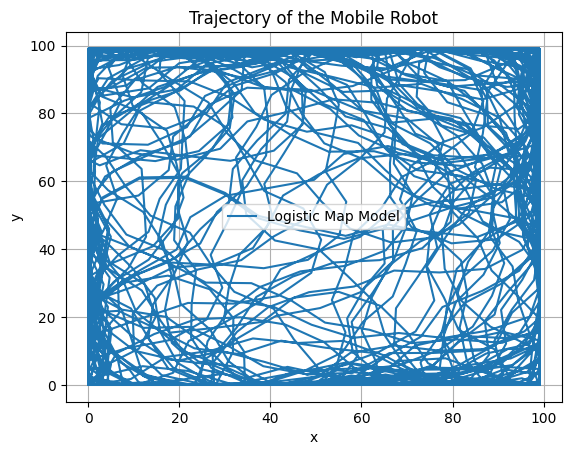

In [ ]:
# Parameters
a = 4
p = 0.2
x = 0.6
theta1d = 0
xp = 10
yp = 10
v = 10

# Simulation
steps = 10000
trajectory = np.zeros((steps, 2))

for t in range(steps):
    x = a * x * (1 - x)
    theta1d = (theta1d + 2 * np.pi * p * (x - 0.5)) % (2 * np.pi)
    xp += v * np.cos(theta1d)
    yp += v * np.sin(theta1d)
    xp = np.clip(xp, 0, 99)  # Clip xp to [0, 99]
    yp = np.clip(yp, 0, 99)  # Clip yp to [0, 99]

    trajectory[t] = [xp, yp]

# Plotting the trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1], label='Logistic Map Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory of the Mobile Robot')
plt.legend()
plt.grid(True)
plt.show()


Covering Ratio: 0.2641


(-0.5, 570.5, 454.5, -0.5)

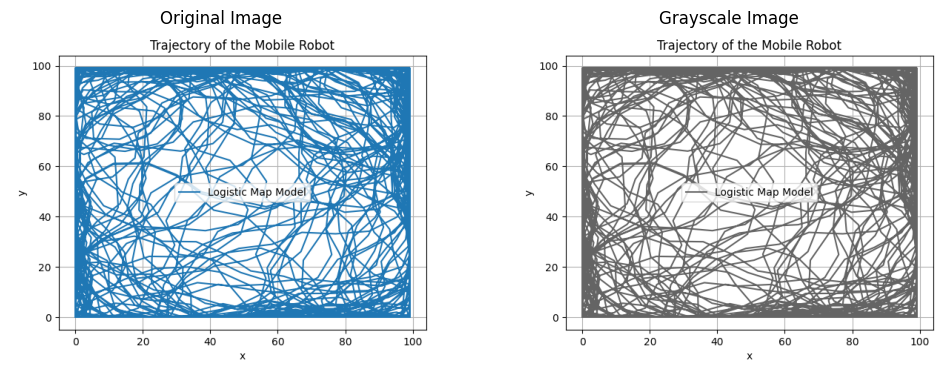

In [ ]:
from PIL import Image
import numpy as np

def calculate_covering_ratio(image, threshold=128):
    grayscale_image = image.convert('L')  # Convert to grayscale
    binary_image = grayscale_image.point(lambda x: 0 if x < threshold else 255, '1')  # Apply threshold
    binary_array = np.array(binary_image)  # Convert image to numpy array
    non_white_pixels = np.count_nonzero(binary_array == 0)  # Count the number of black pixels
    total_pixels = image.size[0] * image.size[1]  # Total number of pixels
    covering_ratio = non_white_pixels / total_pixels
    return covering_ratio

# Example usage
image = Image.open("/content/download (3).png")
covering_ratio = calculate_covering_ratio(image)
print(f"Covering Ratio: {covering_ratio:.4f}")



# Load the image


# Convert to grayscale
grayscale_image = image.convert('L')

# Display the original image and the grayscale image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(grayscale_image, cmap='gray')
axes[1].set_title("Grayscale Image")
axes[1].axis("off")

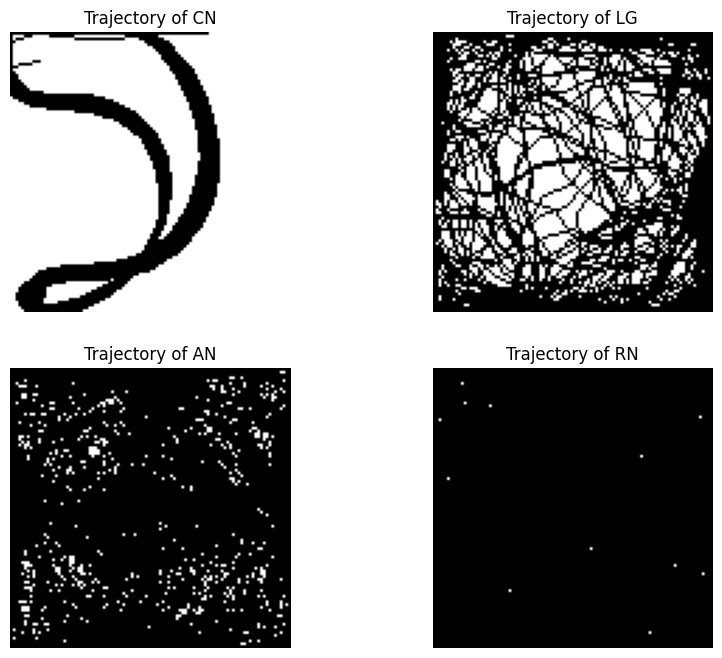

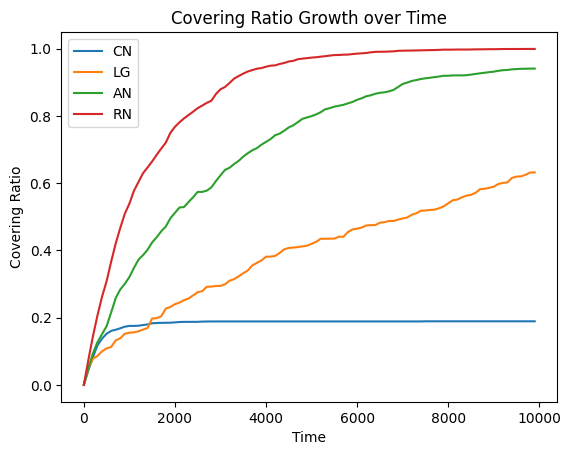

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Parameters
A = 0.5
B = 0.25
C = 0.25
v = 10
h = 0.1  # Step size for RK4 method

# Initial conditions
init_state = np.array([4, 3.6, 0, 10, 10])

# Function defining the Arnold equations and position update
def f(state):
    x1, x2, x3, xp, yp = state
    dx1 = A * np.sin(x3) + C * np.cos(x2)
    dx2 = B * np.sin(x1) + A * np.cos(x3)
    dx3 = C * np.sin(x2) + B * np.cos(x1)
    dxp = v * np.cos(x3)
    dyp = v * np.sin(x3)
    return np.array([dx1, dx2, dx3, dxp, dyp])

# Runge-Kutta 4th order method
def rk4_step(f, state, h):
    k1 = f(state)
    k2 = f(state + h/2 * k1)
    k3 = f(state + h/2 * k2)
    k4 = f(state + h * k3)
    new_state = state + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    # Apply clipping to the position values
    new_state[3] = np.clip(new_state[3], 0, 99)  # Clip xp to [0, 99]
    new_state[4] = np.clip(new_state[4], 0, 99)  # Clip yp to [0, 99]
    return new_state

def chaotic_neuron_model(T, init_x=10, init_y=10, kf=0.5, d=1.0, W=15, kr=0.8905, alpha=4, a=0.5, Em=15.1086, Epp=32.8216):
    x, y = np.zeros(T), np.zeros(T)
    xp, yp = np.zeros(T), np.zeros(T)
    xp[0], yp[0] = init_x, init_y  # Initial position
    v = 10

    for t in range(T-1):
        x[t+1] = kf * x[t] + d + W / (1 + np.exp(-(x[t] + y[t]) / 0.1))
        y[t+1] = kr * y[t] - alpha / (1 + np.exp(-(x[t] + y[t]) / 0.1)) + a
        theta = 2 * np.pi * (x[t] + y[t] + Em) / Epp
        xp[t+1] = xp[t] + v * np.cos(theta)
        yp[t+1] = yp[t] + v * np.sin(theta)
        # Ensure the trajectory stays within the grid
        xp[t+1] = np.clip(xp[t+1], 0, 99)
        yp[t+1] = np.clip(yp[t+1], 0, 99)

    return xp, yp

def logistic_map_model(T, init_x=10, init_y=10, a=4.0, p=0.2, init_cond=0.6):
    x = np.zeros(T)
    theta = np.zeros(T)
    xp, yp = np.zeros(T), np.zeros(T)
    xp[0], yp[0] = init_x, init_y  # Initial position
    v = 10
    x[0] = init_cond
    theta[0] = 0  # Initial theta

    for t in range(T-1):
        x[t+1] = a * x[t] * (1 - x[t])
        theta[t+1] = (theta[t] + 2 * np.pi * p * (x[t] - 0.5)) % (2 * np.pi)
        xp[t+1] = xp[t] + v * np.cos(theta[t+1])
        yp[t+1] = yp[t] + v * np.sin(theta[t+1])
        # Ensure the trajectory stays within the grid
        xp[t+1] = np.clip(xp[t+1], 0, 99)
        yp[t+1] = np.clip(yp[t+1], 0, 99)

    return xp, yp

def arnold_equations_model(T):
    state = init_state
    xp_traj, yp_traj = [state[3]], [state[4]]

    for _ in range(T * 10 - 1):  # 10 times more steps due to smaller step size
        state = rk4_step(f, state, h)
        if _ % 10 == 0:  # Store the position every 10 steps
            xp_traj.append(state[3])
            yp_traj.append(state[4])

    return np.array(xp_traj), np.array(yp_traj)

def random_walk_model(T, init_x=10, init_y=10):
    xp, yp = np.zeros(T), np.zeros(T)
    xp[0], yp[0] = init_x, init_y  # Initial position
    v = 10

    for t in range(T-1):
        theta = np.random.uniform(0, 2 * np.pi)
        xp[t+1] = xp[t] + v * np.cos(theta)
        yp[t+1] = yp[t] + v * np.sin(theta)
        # Ensure the trajectory stays within the grid
        xp[t+1] = np.clip(xp[t+1], 0, 99)
        yp[t+1] = np.clip(yp[t+1], 0, 99)

    return xp, yp

def draw_trajectory(xp, yp, grid_size=100):
    image = Image.new('L', (grid_size, grid_size), color=255)  # Create a white image
    draw = ImageDraw.Draw(image)
    for i in range(len(xp)-1):
        draw.line((xp[i], yp[i], xp[i+1], yp[i+1]), fill=0)  # Draw the trajectory in black
    return image

def calculate_covering_ratio(image):
    image = image.convert('1')  # Convert to binary image (black and white)
    non_white_pixels = np.array(image) == 0  # Count the number of non-white pixels
    covering_ratio = np.sum(non_white_pixels) / (image.size[0] * image.size[1])
    return covering_ratio

def main():
    T = 10000
    grid_size = 100
    models = {
        'CN': chaotic_neuron_model,
        'LG': logistic_map_model,
        'AN': arnold_equations_model,
        'RN': random_walk_model
    }

    covering_ratios = {key: [] for key in models.keys()}

    plt.figure(figsize=(10, 8))
    for key, model in models.items():
        for i in range(5):  # Run each model 5 times with different initial conditions
            if key == 'CN':
                xp, yp = model(T)
            elif key == 'LG':
                xp, yp = model(T)
            elif key == 'AN':
                xp, yp = model(T)
            elif key == 'RN':
                xp, yp = model(T)

            # Adjust xp and yp to the minimum length to avoid mismatch
            min_length = min(len(xp), len(yp))
            xp = xp[:min_length]
            yp = yp[:min_length]

            for t in range(0, min_length, 100):  # Calculate covering ratio every 100 steps
                image = draw_trajectory(xp[:t+1], yp[:t+1], grid_size)
                covering_ratio = calculate_covering_ratio(image)
                covering_ratios[key].append(covering_ratio)
                if t >= min_length - 100 and i == 0:  # Plot trajectory for the first run only
                    plt.subplot(2, 2, list(models.keys()).index(key) + 1)
                    plt.imshow(image, cmap='gray')
                    plt.title(f'Trajectory of {key}')
                    plt.axis('off')

    plt.figure()
    for key, ratios in covering_ratios.items():
        plt.plot(np.arange(0, min_length, 100), ratios[:len(np.arange(0, min_length, 100))], label=key)
    plt.xlabel('Time')
    plt.ylabel('Covering Ratio')
    plt.legend()
    plt.title('Covering Ratio Growth over Time')
    plt.show()

if __name__ == '__main__':
    main()
